In [1]:
# Import Labraries
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from matplotlib import pyplot

In [2]:
# Versions of labraries
import gensim
import keras
import tensorflow
print(f'Tensorflow:{tensorflow.__version__}\nKeras:{keras.__version__}\nGensim:{gensim.__version__}')

Tensorflow:2.5.0
Keras:2.5.0
Gensim:3.6.0


In [3]:
df = pd.read_csv('drive/MyDrive/DataMining/spam_or_not_spam/spam_or_not_spam.csv')

In [4]:
df

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0
...,...,...
1495,abc s good morning america ranks it the NUMBE...,1
1496,hyperlink hyperlink hyperlink let mortgage le...,1
1497,thank you for shopping with us gifts for all ...,1
1498,the famous ebay marketing e course learn to s...,1


In [5]:
df['label'].value_counts()

0    1000
1     500
Name: label, dtype: int64

In [6]:
#Check for missing values on email column
df.isnull().sum()

email    1
label    0
dtype: int64

In [7]:
#Print the record with the missing value
df.loc[df.email.isnull()]

,email,label
1466,NaN,1


In [8]:
# Check for other records with a space on email column
df.loc[df.email == ' ']

,email,label
1306,,1
1328,,1


In [9]:
# Replace the null value with a space
df.fillna(value= ' ', inplace=True)

In [10]:
df.isnull().sum()

email    0
label    0
dtype: int64

In [11]:
# Tokenize and tag the email text
email_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(df.email)]

In [12]:
# Display the first 10 tagged docs from the list
email_docs[:10]

[TaggedDocument(words=['', 'mike', 'bostock', 'said', 'received', 'from', 'trackingNUMBER', 'URL', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'by', 'URL', 'postfix', 'with', 'esmtp', 'id', 'NUMBERedNUMBER', 'for', 'mike', 'mydomain', 'co', 'uk', 'sun', 'NUMBER', 'sep', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'edt', 'x', 'mailer', 'roving', 'constant', 'contact', 'NUMBER', 'NUMBER', 'patchNUMBERc', 'pNUMBERc_schedenhancement_NUMBER_NUMBER_NUMBER', 'http', 'www', 'constantcontact', 'com', 'is', 'worthy', 'of', 'attention', 'and', 'a', 'rule', 'if', 'you', 'go', 'to', 'their', 'web', 'site', 'it', 'would', 'appear', 'that', 'they', 'are', 'in', 'the', 'business', 'of', 'email', 'mass', 'marketing', 'unfortunately', 'their', 'mailing', 'to', 'me', 'got', 'through', 'spamassassin', 'interesting', 'i', 'haven', 't', 'seen', 'anything', 'from', 'these', 'guys', 'in', 'about', 'a', 'year', 'but', 'looking', 'at', 'your', 'hdr', 'they', 're', 'still', 'doing', 'it', 'ok', 'come', 'up', '

In [13]:
# Instantiate model
vector_size = 64
doc_model = Doc2Vec(vector_size=vector_size, window=2, min_count=1, workers=8, epochs = 40)

In [14]:
# Build vocab
doc_model.build_vocab(email_docs)

In [15]:
# Train model
doc_model.train(email_docs, total_examples=doc_model.corpus_count, epochs=doc_model.epochs)

In [16]:
# View vocab
# doc_model.wv.vocab

In [17]:
# Generate vectors
email_vectors = [doc_model.infer_vector((df['email'][i].split(' '))) for i in range(0,len(df['email']))]
email_vectors[:2]

[array([ 0.6010985 , -1.445029  , -0.16186191,  1.0612811 , -0.58350646,
        -1.2259481 ,  0.5064377 , -1.6173826 , -0.25953063, -1.0307313 ,
        -1.3866234 ,  0.07282555,  0.26843047,  1.5014613 ,  0.5833634 ,
         0.50376004,  0.13947655, -0.352982  , -1.0974514 , -0.25856692,
        -0.9894913 ,  0.34899315,  0.4497912 ,  0.66910994,  1.9218479 ,
        -0.9232643 ,  0.10497548,  1.4320832 , -0.39797762,  0.27164787,
        -2.0532255 ,  0.6348793 ,  0.79184985, -0.93727726,  0.9954852 ,
        -1.559333  , -0.16966285,  0.3010086 , -0.03360482,  0.7117597 ,
        -0.364054  ,  0.190926  ,  0.22260152, -0.32518113,  0.37142128,
         0.80847174,  1.1384944 ,  0.07250781, -0.6923209 , -0.37938485,
         0.5924668 , -0.11532009,  0.47215703, -1.9568813 , -0.3574529 ,
         1.1174883 , -1.2580827 ,  0.6320671 ,  0.19226469,  0.6453546 ,
         0.18980716, -0.22566453, -0.8164529 ,  0.16002099], dtype=float32),
 array([ 0.7808726 , -1.944488  , -0.64020765, 

In [18]:
# Create a list of lists
dtv= np.array(email_vectors).tolist()
#set list to dataframe column
df['email_vectors'] = dtv
df.head()

,email,label,email_vectors
0,mike bostock said received from trackingNUMBE...,0,"[0.6010984778404236, -1.4450290203094482, -0.1..."
1,no i was just a little confused because i m r...,0,"[0.7808725833892822, -1.9444880485534668, -0.6..."
2,this is just an semi educated guess if i m wro...,0,"[0.897255003452301, -2.0220112800598145, 0.650..."
3,jm URL justin mason writes except for NUMBER t...,0,"[0.3028466999530792, -1.936866044998169, 0.484..."
4,i just picked up razor sdk NUMBER NUMBER and N...,0,"[0.5954515933990479, -2.9760890007019043, -1.3..."


In [19]:
# Create model input array and expected output vector
X = email_vectors
y = df['label']

In [20]:
# Tranform array and vector to np array of type float32 to be compatiable with the model
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [21]:
X.shape

(1500, 64)

In [22]:
y.shape

(1500,)

In [23]:
#  Train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [24]:
# Define keras model
model_0 = Sequential()
model_0.add(Dense(30, input_dim=vector_size, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))

In [25]:
model_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_0 = model_0.fit(X_train, y_train, epochs=20,
          validation_split=0.2,
          )

Epoch 1/20
29/29 [==============================] - 13s 18ms/step - loss: 0.7463 - accuracy: 0.5503 - val_loss: 0.4916 - val_accuracy: 0.8044
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8187 - val_loss: 0.3737 - val_accuracy: 0.8711
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8870 - val_loss: 0.3179 - val_accuracy: 0.8844
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9276 - val_loss: 0.2830 - val_accuracy: 0.8889
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9339 - val_loss: 0.2653 - val_accuracy: 0.8933
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9281 - val_loss: 0.2413 - val_accuracy: 0.8889
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9360 - val_loss: 0.2278 - val_accuracy: 0.8889
Epoch 8/20
29/29 [

In [26]:
# evaluate the model
_, train_acc = model_0.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_0.evaluate(X_test, y_test, verbose=0)

In [27]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.956, Test: 0.947


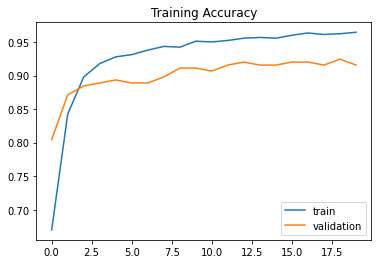

In [39]:
# plot training accuracy
pyplot.plot(history_0.history['accuracy'], label='train')
pyplot.plot(history_0.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.title("Training Accuracy")
pyplot.show()

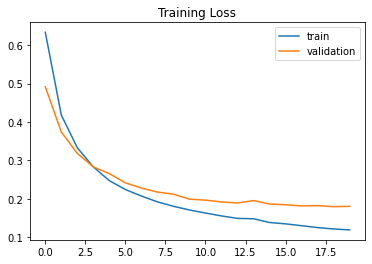

In [40]:
# plot training loss
pyplot.plot(history_0.history['loss'], label='train')
pyplot.plot(history_0.history['val_loss'], label='validation')
pyplot.legend()
pyplot.title("Training Loss")
pyplot.show()

In [30]:
y_pred = model_0.predict (X_test).round()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       240
         1.0       0.98      0.87      0.92       135

    accuracy                           0.95       375
   macro avg       0.96      0.93      0.94       375
weighted avg       0.95      0.95      0.95       375



In [80]:
# Define the keras model
model = Sequential()
model.add(Dense(30, input_dim=vector_size, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
#Early stopping monitor
monitor = EarlyStopping(
                        monitor = 'val_loss',
                        min_delta = 1e-3,
                        patience=15,
                        restore_best_weights=True
                        )

In [82]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [83]:

history = model.fit(X_train, y_train, epochs=50,
          validation_split=0.2,
          batch_size=32,
          callbacks=[monitor]
          )


Epoch 1/50
29/29 [==============================] - 1s 11ms/step - loss: 0.6805 - accuracy: 0.6071 - val_loss: 0.6282 - val_accuracy: 0.7111
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7502 - val_loss: 0.5240 - val_accuracy: 0.8222
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8474 - val_loss: 0.4103 - val_accuracy: 0.8800
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8799 - val_loss: 0.3232 - val_accuracy: 0.8978
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9171 - val_loss: 0.2664 - val_accuracy: 0.9067
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9308 - val_loss: 0.2343 - val_accuracy: 0.9022
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9402 - val_loss: 0.2096 - val_accuracy: 0.9067
Epoch 8/50
29/29 [=

Train: 0.970, Test: 0.963


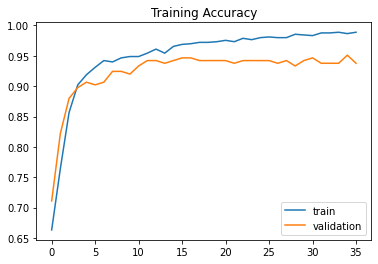

In [87]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.title("Training Accuracy")
pyplot.show()

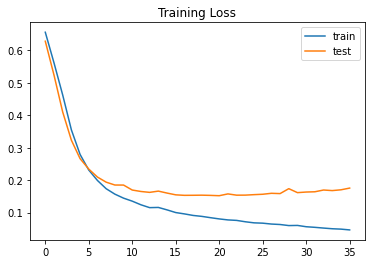

In [85]:
# plot training loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.title("Training Loss")
pyplot.show()

In [86]:
y_pred = model.predict (X_test).round()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       240
         1.0       0.98      0.91      0.95       135

    accuracy                           0.96       375
   macro avg       0.97      0.95      0.96       375
weighted avg       0.96      0.96      0.96       375

